# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
data = pd.read_csv('./Boston.csv')
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
print(data.describe)

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2    

## Data Overview

- Observations
- Sanity checks

In [4]:
# Check information of the data:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [5]:
# Checking the number of unique values in each column
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

**Observations:**

- There are **506 observations and 13 columns** in the data.
- All the column have 506 non-null values, i.e., there are **no missing values** in the data.


- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.
- **Continuous columns:** CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, MEDV, and LSTAT.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [6]:
# Creating numerical columns
num_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'MEDV', 'LSTAT']

# Creating categorical variables 
cat_cols = ['CHAS', 'RAD']

In [7]:
# Univariate analysis of numerical columns:
distro = data[num_cols].describe().T
print(distro)

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  10

Text(0, 0.5, 'Frequency')

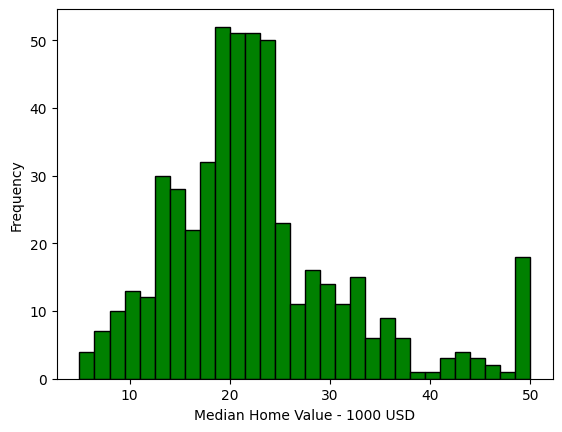

In [8]:
#Distribution of MEDV:
distrobution = data['MEDV'].plot(kind='hist', bins=30, color='green', edgecolor='black')
plt.xlabel('Median Home Value - 1000 USD')
plt.ylabel('Frequency')

**Observations:**

- The Median Home Value ranges from $5000 - $50,000 USD. 
- The Median Home Value range has a standard deviation of 9.197104 (1000 USD) and an average of 22.532806 (1000 USD)

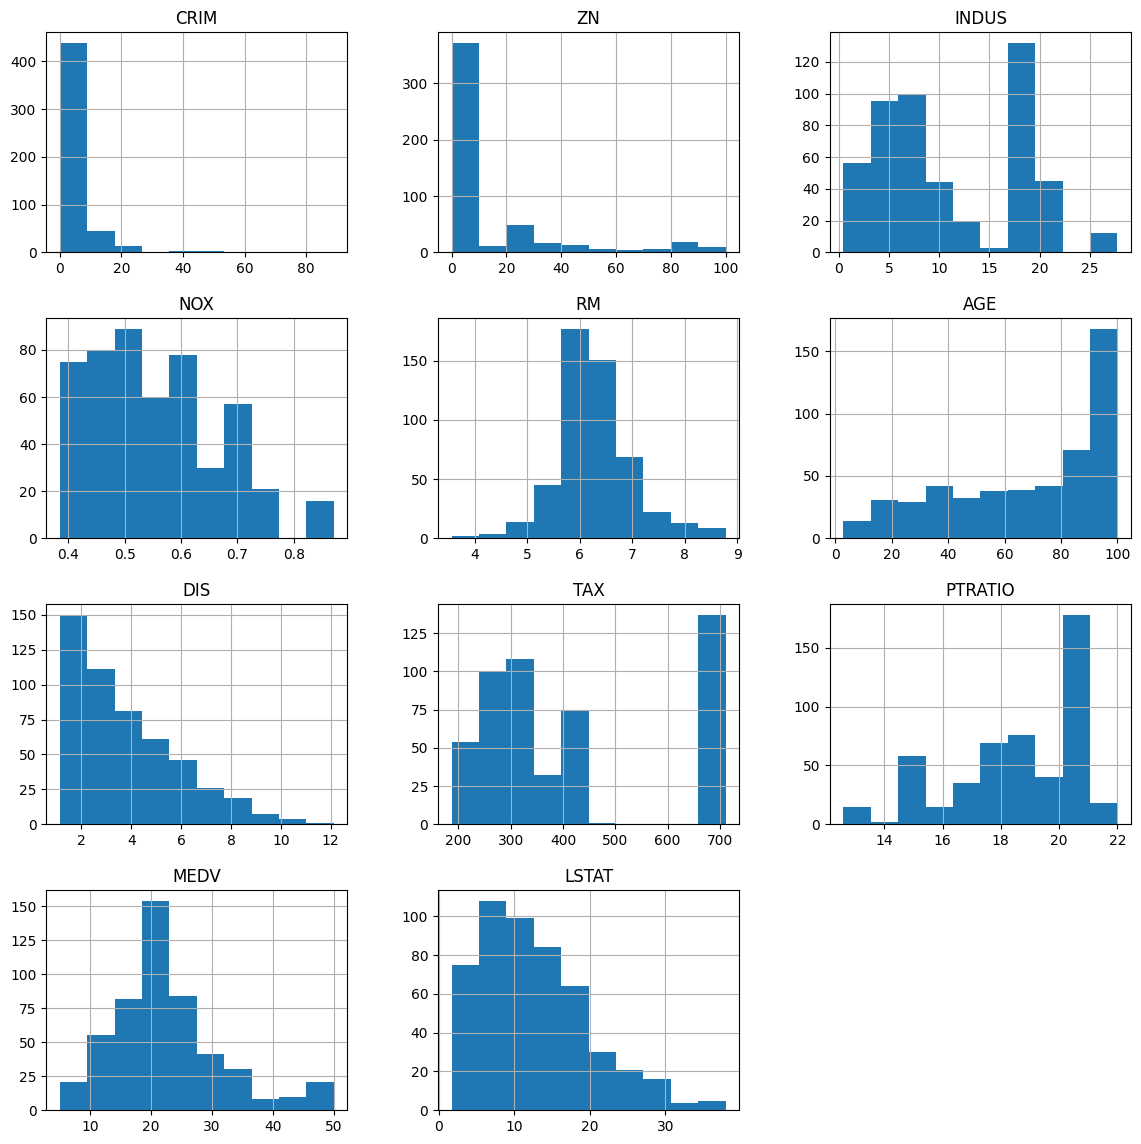

In [9]:
# Creating histograms - here we will look at the distributions for all the individual numerical columns
data[num_cols].hist(figsize = (14, 14))

plt.show()

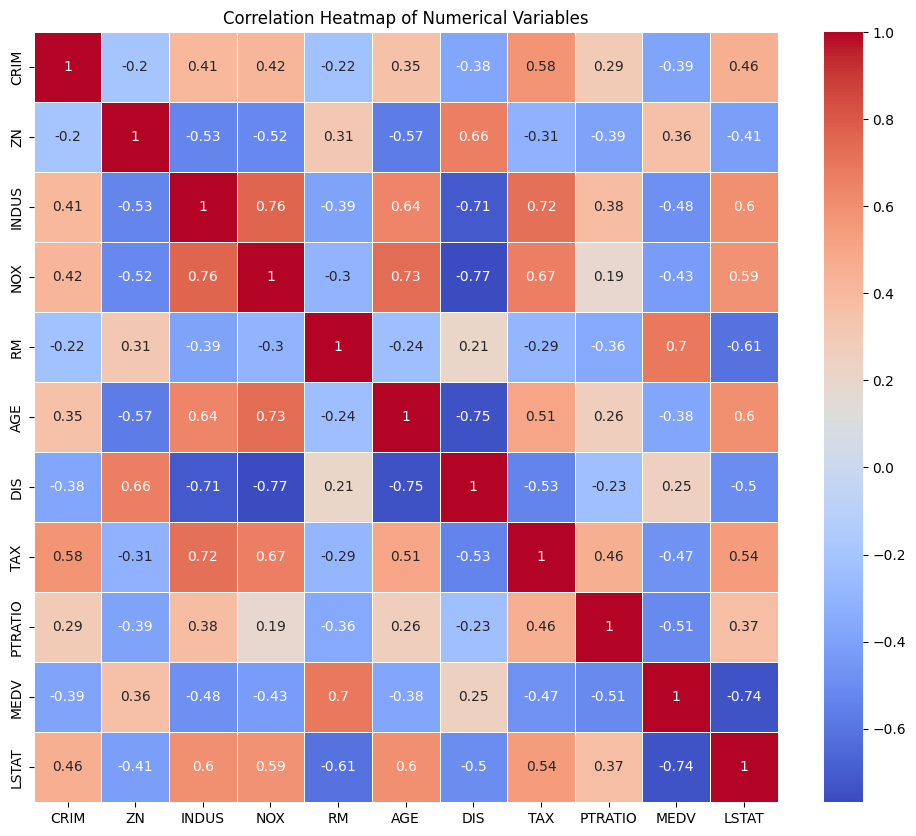

In [10]:
# Next we will create correlation heat maps for all the individual numerical variables:
plt.figure(figsize=(12, 10))
correlation_matrix = data[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [11]:
# What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables? -->
# Analyzing the correlation matrix
# Our Dependent Variable is Median Home Value (what we are trying to predict)
# 1. Correlation between dependent variable (MEDV) and independent variables:
print("Correlation between MEDV and other variables:")
for column in correlation_matrix.index:
    if column != 'MEDV':
        correlation = correlation_matrix.loc['MEDV', column]
        print(f"{column}: {correlation:.3f}")

print("\nObservations:")
print("- LSTAT has a strong negative correlation with MEDV (-0.738)")
print("- RM has a strong positive correlation with MEDV (0.695)")
print("- PTRATIO has a moderate negative correlation with MEDV (-0.508)")
print("- INDUS and AGE have weak to moderate negative correlations with MEDV")
print("- TAX has a weak to modorate negative correlation with MEDV")

# 2. Correlations among independent variables:
print("\nStrong correlations among independent variables:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if i != j:
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > 0.6 and correlation_matrix.columns[i] != 'MEDV' and correlation_matrix.columns[j] != 'MEDV':
                print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation:.3f}")

print("\nConclusions:")
print("1. There are significant correlations between the dependent variable (MEDV) and several independent variables.")
print("2. Some independent variables are strongly correlated with each other, which may indicate multicollinearity.")
print("3. Feature selection or dimensionality reduction techniques might be useful in model building.")

Correlation between MEDV and other variables:
CRIM: -0.388
ZN: 0.360
INDUS: -0.484
NOX: -0.427
RM: 0.695
AGE: -0.377
DIS: 0.250
TAX: -0.469
PTRATIO: -0.508
LSTAT: -0.738

Observations:
- LSTAT has a strong negative correlation with MEDV (-0.738)
- RM has a strong positive correlation with MEDV (0.695)
- PTRATIO has a moderate negative correlation with MEDV (-0.508)
- INDUS and AGE have weak to moderate negative correlations with MEDV
- TAX has a weak to modorate negative correlation with MEDV

Strong correlations among independent variables:
ZN and DIS: 0.664
INDUS and NOX: 0.764
INDUS and AGE: 0.645
INDUS and DIS: -0.708
INDUS and TAX: 0.721
INDUS and LSTAT: 0.604
NOX and AGE: 0.731
NOX and DIS: -0.769
NOX and TAX: 0.668
RM and LSTAT: -0.614
AGE and DIS: -0.748
AGE and LSTAT: 0.602

Conclusions:
1. There are significant correlations between the dependent variable (MEDV) and several independent variables.
2. Some independent variables are strongly correlated with each other, which may 

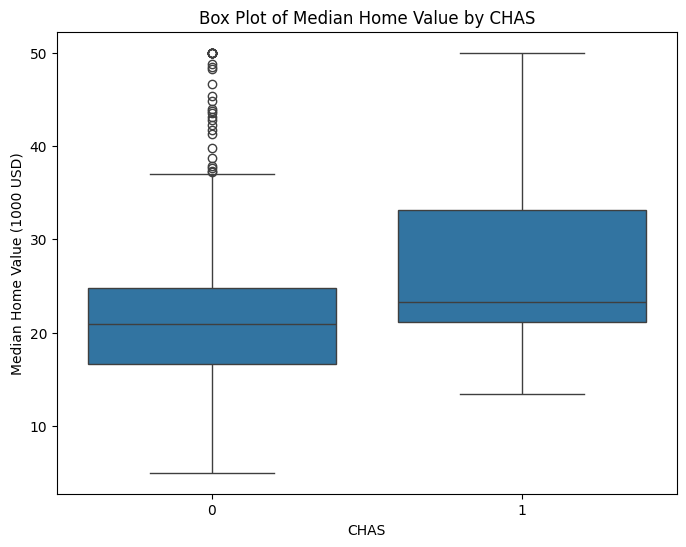

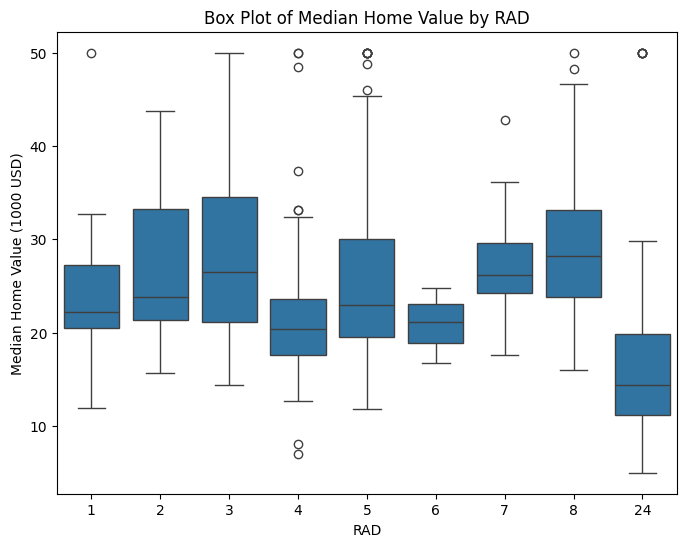

In [12]:
# Next do Bivariate and Multivariate Analysis on the data to analyze different categorical and numerical variables
# We will check how Median Home Value is Related (or not related) to other variables.

for i in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=i, y='MEDV', data=data)
    plt.xlabel(i)
    plt.ylabel('Median Home Value (1000 USD)')
    plt.title(f'Box Plot of Median Home Value by {i}')
    plt.show()

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### <a id='link1'>Summary of EDA</a>

**Data Description:**

* There are **506 observations and 13 columns** in the data.

* All the columns have 506 non-null values, i.e., **there are no missing values** in the data.  So no need to address missing values or drop any data.

* On the basis of the number of unique values in each column and the data description, we can **identify the continuous and categorical columns** in the data.
    - On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.
        - **Continuous columns:** CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, MEDV, and LSTAT.
        - **Categorical columns:** RAD, CHAS


**Data Cleaning:**

* **The independent variables in this dataset have different scales**. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. **This will impact the performance of our machine learning algorithm**, and we do not want our algorithm to be biased towards one feature.
* The solution to this issue is **Feature Scaling**, i.e., scaling the dataset so as to give every transformed variable a comparable scale.
* In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance.


**Observations from EDA:**

* The Median Home Value ranges from $5000 - $50,000 USD. The Median Home Value range has a standard deviation of 9.197104 (1000 USD) and an average of 22.532806 (1000 USD).
* The data is skewed slightly to the left (the lower end of the range).
* Observations:
    - LSTAT has a strong negative correlation with MEDV (-0.738)
    - RM has a strong positive correlation with MEDV (0.695)
    - PTRATIO has a moderate negative correlation with MEDV (-0.508)
    - INDUS and AGE have weak to moderate negative correlations with MEDV
    - TAX has a weak to moderate negative correlation with MEDV

    Strong correlations among independent variables:
    ZN and DIS: 0.664
    INDUS and NOX: 0.764
    INDUS and AGE: 0.645
    INDUS and DIS: -0.708
    INDUS and TAX: 0.721

* There are significant correlations between the dependent variable (MEDV) and several independent variables.
* Some independent variables are strongly correlated with each other, which may indicate multicollinearity.
* Feature selection or dimensionality reduction techniques might be useful in model building.







In [13]:
# Separating the target variable and other variables
X = data.drop('MEDV', axis=1)

X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [14]:
# Next we will scale the data to avoid impacts to our model:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

count    506.000000
mean       3.034513
std        0.408757
min        1.609438
25%        2.834680
50%        3.054001
75%        3.218876
max        3.912023
Name: MEDV, dtype: float64


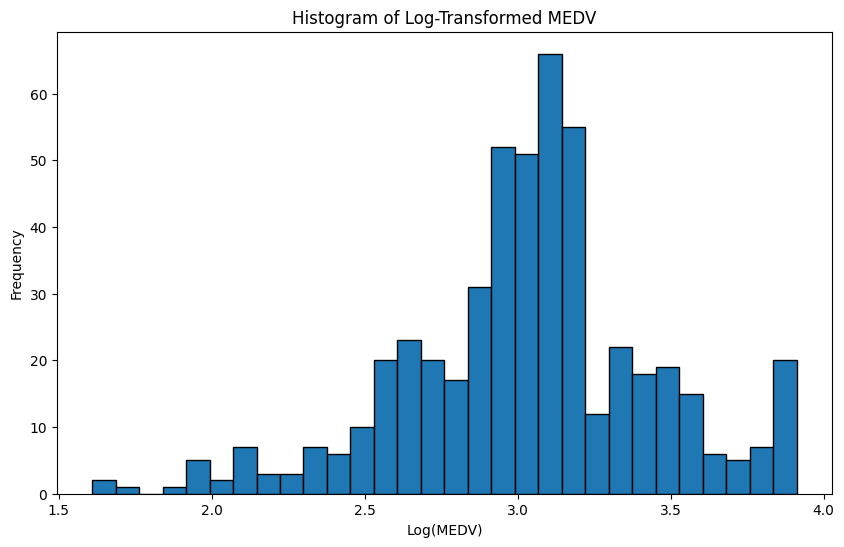

In [15]:
# Perform Log transformation of dependent variable to adress slight skewing
# Apply log transformation to MEDV
Y = np.log(data['MEDV'])

# Verify the transformation
print(Y.describe())

# Plot new histogram to visualize the effect
plt.figure(figsize=(10, 6))
plt.hist(Y, bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed MEDV')
plt.xlabel('Log(MEDV)')
plt.ylabel('Frequency')
plt.show()


* The data now has a more normal distribution to enable the training of our model.

## Model Building - Linear Regression

In [16]:
# Split our Training and Testing Data - We will use 70% Training Data & 30% Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Get a list of only the features most correlated with MEDV
correlations = data.corr()['MEDV'].abs().sort_values(ascending=False)

# Select top correlated features (excluding MEDV itself)
top_features = correlations[1:6].index.tolist()
# We will use this later for future model iterations.

# Create X (features) and y (target) for training
X_train = x_train
Y_train = y_train
Y_test = y_test
X_test = x_test

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(354, 12)
(354,)
(152, 12)
(152,)


In [18]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the training set
y_pred = model.predict(X_train)

# Calculate performance metrics
mse = mean_squared_error(Y_train, y_pred)
r2 = r2_score(Y_train, y_pred)
mae = mean_absolute_error(Y_train, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


print("####################################")
# Print model coefficients
for feature, coef in zip(top_features, model.coef_):
    print(f"{feature}: {coef}")


print("####################################")
print("Intercept:", model.intercept_)


Mean Squared Error: 0.0332741923322763
R-squared Score: 0.7888008136986557
Mean Absolute Error: 0.13124689819260407
Root Mean Squared Error: 0.1824121496290099
####################################
LSTAT: -0.077206581328643
RM: 0.033154878643109564
PTRATIO: 0.015348485640002081
INDUS: 0.030727148970486923
TAX: -0.11269185464548571
####################################
Intercept: 3.0368626554772393


## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

* <strong>Model Performance:</strong>


- Mean Squared Error: 0.05733926878131168
- R-squared Score: 0.6663494298969739
- Mean Absolute Error: 0.16530183246221775
- Root Mean Squared Error: 0.23945619386708644

####################################
- LSTAT: -0.2432756072719189
- RM: 0.08446771142518537
- PTRATIO: -0.0683761943820153
- INDUS: 0.030516718756087538
- TAX: -0.0631079843344046

####################################
- Intercept: 3.0293823703667484

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to the dataframe. This is needed for the VIF calculation
X_scaled['Intercept'] = 1

# Calculate and print VIF
vif = pd.DataFrame()
vif["variables"] = X_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif[vif['variables'].isin(top_features)])

   variables       VIF
2      INDUS  3.987181
5         RM  1.912532
9        TAX  9.002158
10   PTRATIO  1.797060
11     LSTAT  2.870777


- VIF = 1: The features are not correlated.
- 1 < VIF < 5: The features have moderate correlation or multicollinearity.
- VIF >= 5: The features are highly correlated or multicollinear.

A high VIF value indicates that the associated feature is highly collinear with the other features, which means it is redundant in the presence of other features.

As can be seen from the above table, <strong> the VIF values for TAX indicates HIGH levels of multi-colinearity with the other features in the analysis.</strong>

In [20]:
# Next we will attempt to use use Ridge regression to help reduce the effects of multicollinearity by adding a penalty term to the loss function that constrains the coefficients.
from sklearn.linear_model import Ridge

def ridge_regression(X_train, Y_train, X_test, Y_test, alpha):
    alphaVal = alpha  # We can adjust this value from one run to another to test different behaviours.
    # Create and train the Ridge regression model
    ridge_model = Ridge(alpha=alphaVal)
    ridge_model.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred_ridge = ridge_model.predict(X_test)

    # Calculate the mean squared error and R-squared score
    mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
    r2_ridge = r2_score(Y_test, y_pred_ridge)
    mea_ridge = mean_absolute_error(Y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    return {"mse": mse_ridge, 
            "r2": r2_ridge, 
            "mae": mea_ridge, 
            "rmse": rmse_ridge,
            "coefficients": ridge_model.coef_,
            "model": ridge_model}

ridge_regression1 = ridge_regression(X_train, Y_train, X_test, Y_test, 1.0)

# Print the results
print("Ridge Regression Results:")
print(f"Mean Squared Error: {ridge_regression1['mse']}")
print(f"R-squared Score: {ridge_regression1['r2']}")
print(f"Mean Absolute Error: {ridge_regression1['mae']}")
print(f"Root Mean Squared Error: {ridge_regression1['rmse']}")

# Print the coefficients
coefficients = pd.DataFrame({'Feature': X_test.columns, 'Coefficient': ridge_regression1['coefficients']})
print("\nRidge Regression Coefficients:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))


Ridge Regression Results:
Mean Squared Error: 0.044517114163713185
R-squared Score: 0.7627375298393526
Mean Absolute Error: 0.1544977583641141
Root Mean Squared Error: 0.21099079165620757

Ridge Regression Coefficients:
    Feature  Coefficient
11    LSTAT    -0.209550
8       RAD     0.111539
4       NOX    -0.110731
9       TAX    -0.100355
7       DIS    -0.090872
10  PTRATIO    -0.086619
0      CRIM    -0.076256
5        RM     0.056026
1        ZN     0.032322
3      CHAS     0.030944
6       AGE     0.027575
2     INDUS     0.013403


* NOTE that performance with RIDGE Regression is not significantly better than basic linear model.

| Metric | Model 1 | Model 2 (Ridge) |
|--------|---------|---------|
| Mean Squared Error | 0.047968248476326844 | 0.04751944299616488 |
| R-squared Score | 0.7208783126968236 | 0.7234898598529709 |
| Mean Absolute Error | 0.15065061316450057 | 0.1499130668180373 |
| Root Mean Squared Error | 0.21901654840748186 | 0.21798954790577663 |


* NEXT - let's try a Ridge Model with only the top most correlated features with strongest correlation to MEDV.

In [21]:
# Create X (features) and y (target) for training
X_train2 = x_train[top_features]
Y_train2 = y_train
Y_test2 = y_test
X_test2 = x_test[top_features]

# Test including only the features MOST correlated to MEDV
# Training a regression model to predict median home value based off of the top most correlated features:
# - LSTAT has a strong negative correlation with MEDV (-0.738)
# - RM has a strong positive correlation with MEDV (0.695)
# - PTRATIO has a moderate negative correlation with MEDV (-0.508)
# - INDUS and AGE have weak to moderate negative correlations with MEDV
# - TAX has a weak to moderate negative correlation with MEDV

ridge_regression2 = ridge_regression(X_train2, Y_train2, X_test2, Y_test2, 1.0)

# Print the results
print("Ridge Regression Results:")
print(f"Mean Squared Error: {ridge_regression2['mse']}")
print(f"R-squared Score: {ridge_regression2['r2']}")
print(f"Mean Absolute Error: {ridge_regression2['mae']}")
print(f"Root Mean Squared Error: {ridge_regression2['rmse']}")

# Print the coefficients
coefficients = pd.DataFrame({'Feature': X_test2.columns, 'Coefficient': ridge_regression2['coefficients']})
print("\nRidge Regression Coefficients:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))


Ridge Regression Results:
Mean Squared Error: 0.056887987945980406
R-squared Score: 0.6968045931078245
Mean Absolute Error: 0.16385095860715235
Root Mean Squared Error: 0.23851202893351187

Ridge Regression Coefficients:
   Feature  Coefficient
0    LSTAT    -0.212648
1       RM     0.086572
2  PTRATIO    -0.067696
4      TAX    -0.057720
3    INDUS     0.007039


| Metric | Model 1 | Model 2 (Ridge) | Model 3 (Ridge - Top Features Only)
|--------|---------|---------|---------|
| Mean Squared Error | 0.047968248476326844 | 0.04751944299616488 | 0.057278159962931084
| R-squared Score | 0.7208783126968236 | 0.7234898598529709 | 0.6667050150400069
| Mean Absolute Error | 0.15065061316450057 | 0.1499130668180373 | 0.16518233903818108
| Root Mean Squared Error | 0.21901654840748186 | 0.21798954790577663 | 0.2393285606920559


* Model 3 increased MSE, MAE, and RMSE compared to Model 1 & 2.   This is not a good go-forward model.


* NEXT - we will try removing only the TAX feature as that feature has high levels of co-linearity. 

In [22]:
# Create X (features) and y (target) for training
X_train3 = x_train.drop(['TAX'], axis=1)
Y_train3 = y_train
Y_test3 = y_test
X_test3 = x_test.drop(['TAX'], axis=1)

ridge_regression3 = ridge_regression(X_train3, Y_train3, X_test3, Y_test3, 1.0)

# Print the results
print("Ridge Regression Results:")
print(f"Mean Squared Error: {ridge_regression3['mse']}")
print(f"R-squared Score: {ridge_regression3['r2']}")
print(f"Mean Absolute Error: {ridge_regression3['mae']}")
print(f"Root Mean Squared Error: {ridge_regression3['rmse']}")

# Print the coefficients
coefficients = pd.DataFrame({'Feature': X_test3.columns, 'Coefficient': ridge_regression3['coefficients']})
print("\nRidge Regression Coefficients:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))

Ridge Regression Results:
Mean Squared Error: 0.046207540534790426
R-squared Score: 0.7537280793401239
Mean Absolute Error: 0.16029941082654933
Root Mean Squared Error: 0.2149593927577728

Ridge Regression Coefficients:
    Feature  Coefficient
10    LSTAT    -0.211495
4       NOX    -0.116367
7       DIS    -0.095266
9   PTRATIO    -0.092295
0      CRIM    -0.075739
5        RM     0.057131
8       RAD     0.043530
3      CHAS     0.035130
6       AGE     0.024794
1        ZN     0.022226
2     INDUS    -0.019762


| Metric | Model 1 | Model 2 (Ridge) | Model 3 (Ridge - Top Features Only) | Model 4 (Ridge - Drop Colinear)
|--------|---------|---------|---------|---------|
| Mean Squared Error | 0.047968248476326844 | 0.04751944299616488 | 0.057278159962931084 | 0.04688763405099487
| R-squared Score | 0.7208783126968236 | 0.7234898598529709 | 0.6667050150400069 | 0.7271662829960033
| Mean Absolute Error | 0.15065061316450057 | 0.1499130668180373 | 0.16518233903818108 | 0.15056173619019986
| Root Mean Squared Error | 0.21901654840748186 | 0.21798954790577663 | 0.2393285606920559 | 0.2165355260713467


* Model 4 Has the Best Performance So Far - Lowest Error and Highest R2

In [23]:
# Let's save Model4 for future use.
model4 = ridge_regression3['model']

In [24]:
# Try Cross Validation to Pick the Best Model
from sklearn.model_selection import cross_val_score

# Create a Ridge regression object
ridge = Ridge(alpha=1.0)
X_cross_val = X_scaled.drop(['TAX'], axis=1)

# Perform 5-fold cross validation
scores = cross_val_score(ridge, X_cross_val, Y, scoring='neg_mean_squared_error', cv=5)

# The 'cross_val_score' function returns the negative mean squared error for each fold,
# so we take the negative of the scores to get the actual mean squared errors
mse_scores = -scores

# Print the mean squared error for each fold
print(f'MSE for each fold: {mse_scores}')

# Calculate the mean and standard deviation of the mean squared errors across folds
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard deviation of MSE: {np.std(mse_scores)}')

MSE for each fold: [0.01956091 0.04952401 0.03283065 0.09903736 0.0627302 ]
Mean MSE: 0.05273662620490319
Standard deviation of MSE: 0.027389147608471387


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

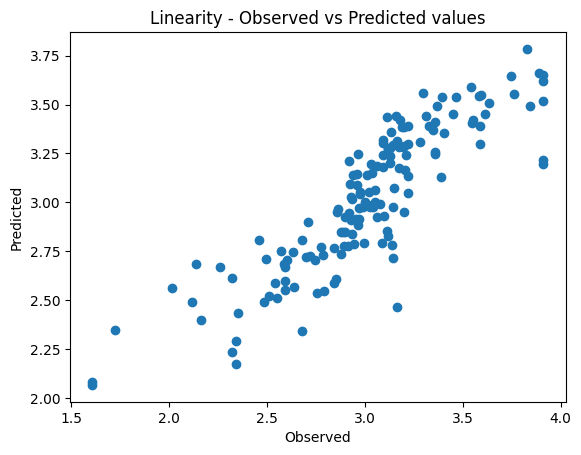

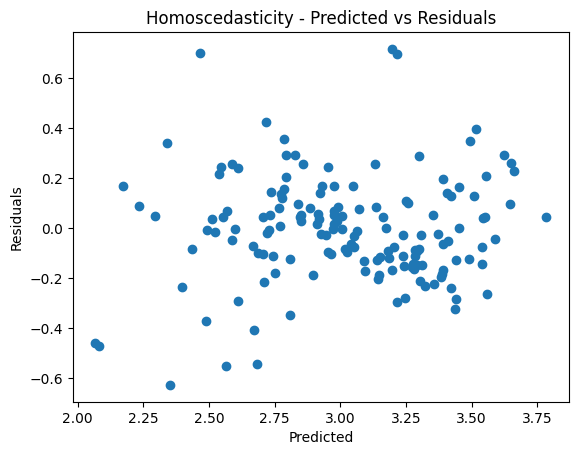

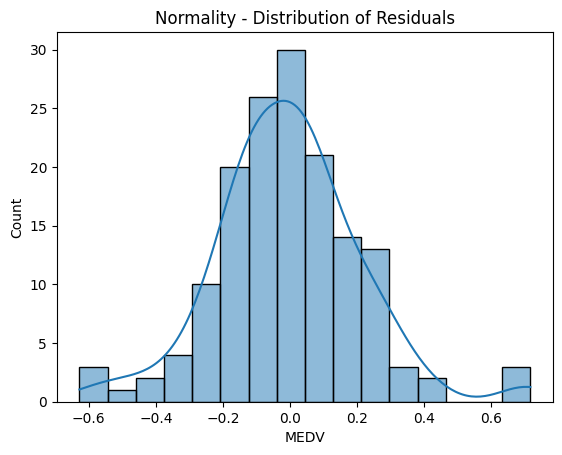

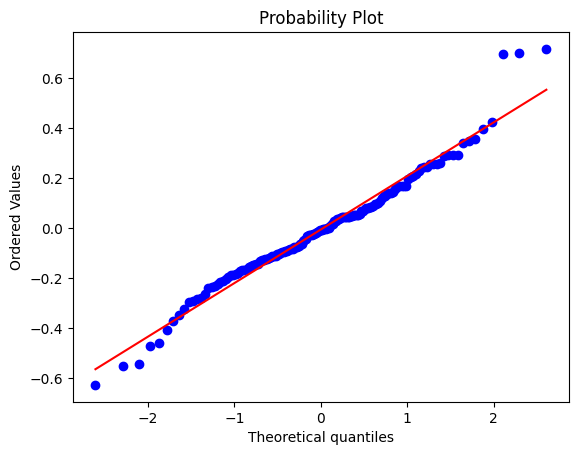

Durbin-Watson statistic: 2.1306591751033346


In [25]:
# Let's Check the Linear Assumptions in our Data to Ensure we can make statistical regression models from this data
from scipy import stats

Y_pred3 = model4.predict(X_test3)

# Calculate residuals
residuals = Y_test3 - Y_pred3

# Check for Linearity
# Scatter plot of observed vs predicted values
plt.scatter(Y_test3, Y_pred3)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Linearity - Observed vs Predicted values')
plt.show()

# Check for Homoscedasticity
# Scatter plot of residuals vs predicted values
plt.scatter(Y_pred3, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity - Predicted vs Residuals')
plt.show()

# Check for Normality
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Normality - Distribution of Residuals')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# Check for Independence
# Durbin-Watson’s statistic
# Note: The Durbin-Watson’s statistic ranges from 0 to 4 with around 2 suggesting no autocorrelation.
from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson statistic:', durbin_watson(residuals))



1. Linearity: This plot checks whether there is a linear relationship between the predicted values and residuals. <strong>The results of our plot DO look to follow a linear relationship up and two the right - meaning this assumption is valid.</strong>

2. Homoscedasticity: This plot helps us check the ‘constant variance’ assumption. We want to see a cloud of points that’s roughly rectangular/square in shape. If the shape is conical (either small-to-large or large-to-small), then it’s a sign of heteroscedasticity, i.e., non-constant variance.  <strong>The results of our plot do look to be randomly distributed - indicating this asumption is valid.</strong>


3. Normality: This plot (or test) checks whether the residuals are normally distributed. It’s desirable for the errors to follow a normal distribution to make valid statistical inferences. The Jarque-Bera test is a common statistical test for normality where the null hypothesis is that the data is normally distributed. A large test statistic or a p-value less than 0.05 indicates that the data is not normally distributed.  <stong>The Residuals DO follow a normal distribution, so this assumption is valid. </strong>


3.   Our Probability Plot does show matching with Linear Behaviour meaning that the assumption of linearity is <strong>valid</strong>

## Final Model

In [26]:
# The Best Model Observed was Model 4 which dropped TAX variable but included all the remaining features.
# Print the Ridge Regression model summary
print("Ridge Regression Model Summary:")
print("-------------------------------")
print(f"Features: \n{X_test3.columns}")
print(f"Coefficients: \n{model4.coef_}")
print(f"Intercept: {model4.intercept_}")
print(f"R-squared: {ridge_regression3['r2']}")
print(f"Mean Squared Error: {ridge_regression3['mse']}")

Ridge Regression Model Summary:
-------------------------------
Features: 
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'LSTAT'],
      dtype='object')
Coefficients: 
[-0.07573886  0.02222551 -0.01976182  0.03513034 -0.11636739  0.05713112
  0.02479429 -0.09526579  0.0435304  -0.0922952  -0.21149512]
Intercept: 3.0361609965776633
R-squared: 0.7537280793401239
Mean Squared Error: 0.046207540534790426


## Actionable Insights and Recommendations 

- Our House Pricing Data was Log Transformed - so the output of this model is in log scale. After making prediction, we need to transform this value from log scale back to its original scale by doing the inverse of log transformation, i.e., taking exponentiation.</font>


In [27]:
# Median Home Value (MEDV) Predictions Transformed
test_predictions = model4.predict(X_test3)
# Median Home Value (MEDV) Predictions:
test_predictions_inverse_transformed = np.exp(test_predictions)

Text(0, 0.5, 'Count')

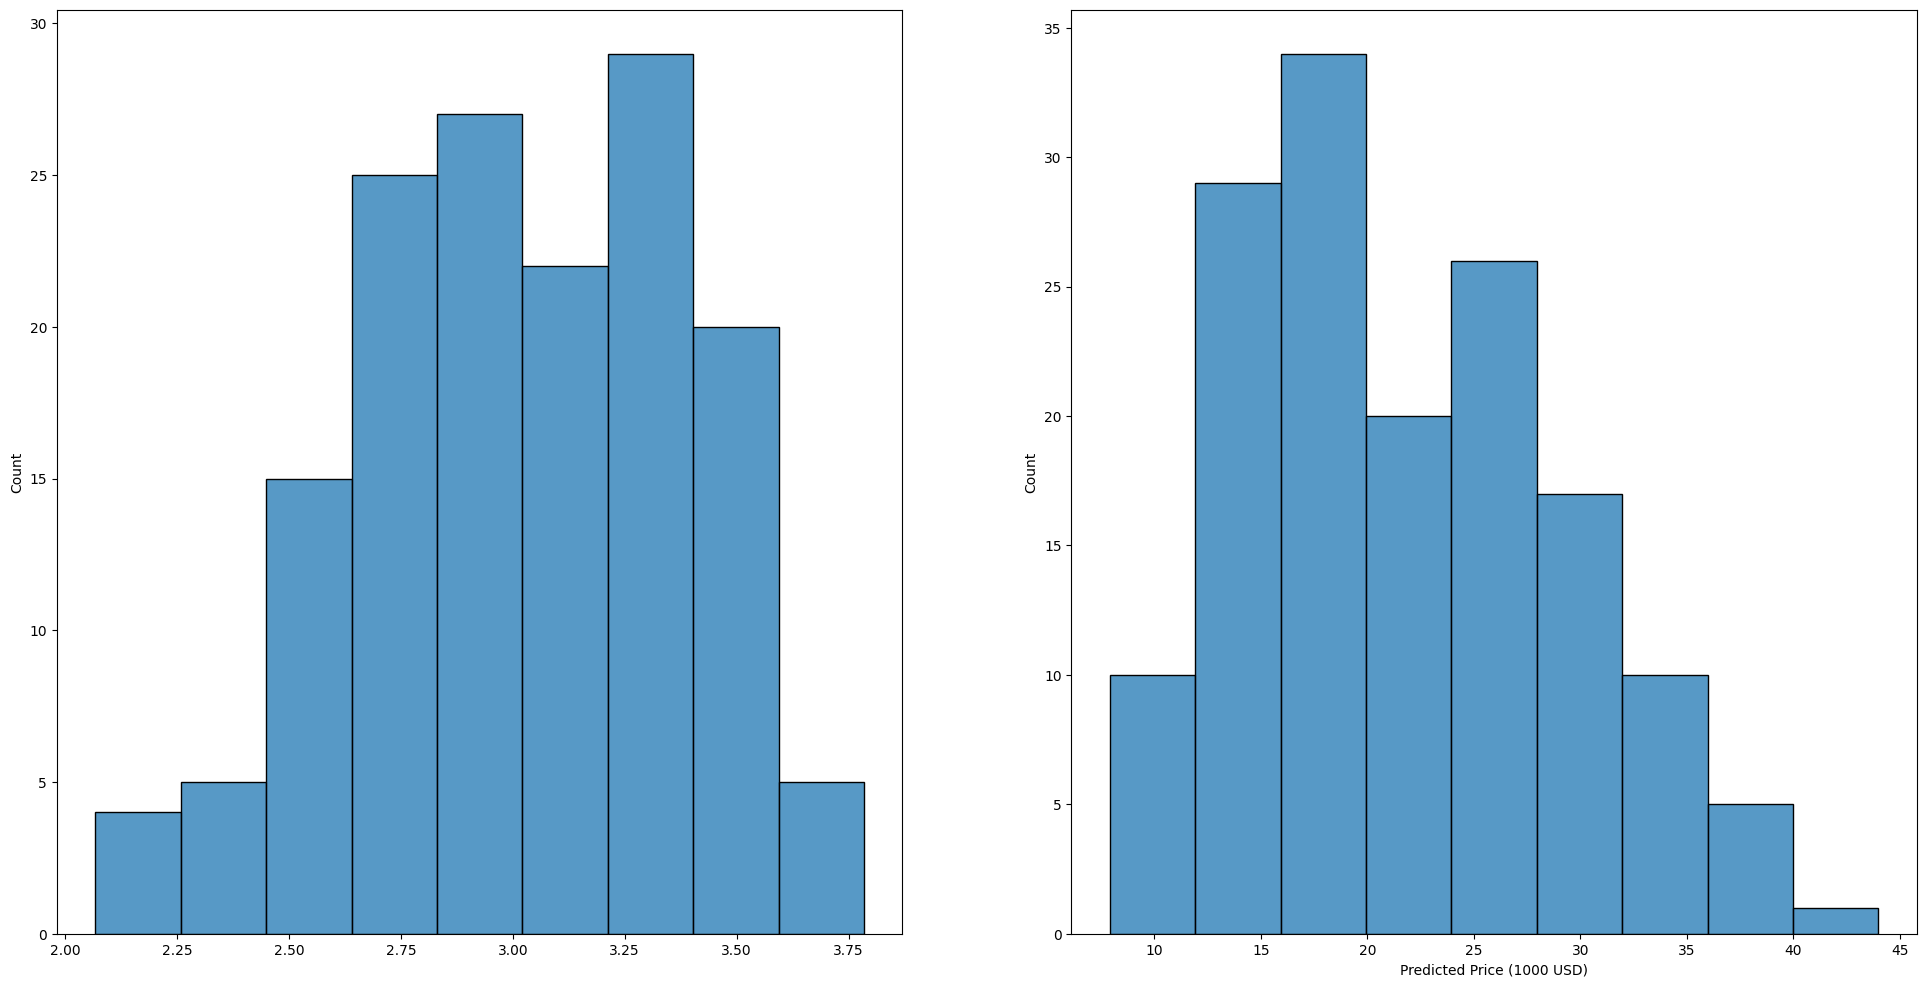

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

sns.histplot(test_predictions, ax = ax[0])
plt.xlabel('Predicted Price (Log Scale)')
plt.ylabel('Count')

sns.histplot(test_predictions_inverse_transformed, ax = ax[1])
plt.xlabel('Predicted Price (1000 USD)')
plt.ylabel('Count')

- I performed EDA, univariate and bivariate analysis, on all the variables in the dataset.
- After that looked to see if there were any missing values treatment using the relationship between variables.  <strong>No Missing Variables Observed</strong>
- Started the model building process with a series of Feature Tests:
    1. Build initial Simple Linear Regression Model using all the features.
    2. 2nd Model was built using Ridge Regression with all features.
    3. 3rd Model was built using Ridge Regression and only the top most correlated features (LSTAT, RM, PTRATIO, INDUS, AGE, TAX)
    4.  4th Model was built using Ridge Regression and all features - but we removed multicollinearity from the data and analyzed the model summary report to drop insignificant features.

- Results of the 4 Models' Performance is Seen in the Table Below:
    | Metric | Model 1 | Model 2 (Ridge) | Model 3 (Ridge - Top Features Only) | Model 4 (Ridge - Drop Colinear)
    |--------|---------|---------|---------|---------|
    | Mean Squared Error | 0.047968248476326844 | 0.04751944299616488 | 0.057278159962931084 | 0.04688763405099487
    | R-squared Score | 0.7208783126968236 | 0.7234898598529709 | 0.6667050150400069 | 0.7271662829960033
    | Mean Absolute Error | 0.15065061316450057 | 0.1499130668180373 | 0.16518233903818108 | 0.15056173619019986
    | Root Mean Squared Error | 0.21901654840748186 | 0.21798954790577663 | 0.2393285606920559 | 0.2165355260713467


- We checked for different assumptions of linear regression - all assumptions held true, so no iterations to the model were required.

- Finally, we evaluated the model using different evaluation metrics.

Lastly below is the model equation:

**$\log ($ Median Home Value $)$ $= -.1003$ CRIM $ + .0051$ ZN $ * + -.0075$ INDUS $ * + 0.0369$ CHAS $ * -.0947*$ NOX $ + 0.0618$ RM $* + 0.0134*$ AGE $ - .09025*$ DIS $  + 0.0407*$ RAD $ - 0.0826*$ PTRATIO $ -0.2267*$ LSTAT $ + 3.0318**

- From the above equation, we can interpret that, with one unit change in the variable **CRIM**, the outcome variable, i.e., log of **Median Home Value (MEDV)** decreases by .1003 units. So, if we want to increase the median home value, we may want to research areas with <strong>lower Per capita crime rates</strong>.

- On average, the largest deciding factors in the meadian value of a home are:
    1. **LSTAT:** % lower status of the population
    2. **CRIM:** Per capita crime rate by town
    3. **NOX:** Nitric Oxide concentration (parts per 10 million) (Air Quality of the Town)
    4. **DIS:** Weighted distances to five Boston employment centers
    5. **PTRATIO:** Pupil-teacher ratio by town